# EDA_covid_19

  * 시시각각 바뀌는 코로나-19 우세종(형질) 에 따른 현황 파악 목적,  
  
  * 2020.07.06 ~ 2021.11.01 간 전 세계의 코로나19 발병 케이스 및 형질(type) 분석을 진행했습니다.
  


In [4]:
# import libraries

import pandas as pd
import numpy as np
import io
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# 데이터 불러오기

data = pd.read_csv("covid.csv", index_col = "date", infer_datetime_format = True)

In [3]:
data.head()
# variant = 코로나 종류
# num_sequences = 날짜 당 코로나 종류별 발병 횟수
# perc_sequences = 케이스 비율
# num_sequences_total = 각 나라 총 케이스 갯수

location    variant  num_sequences  perc_sequences  \
date                                                            
2020-07-06   Angola      Alpha              0             0.0   
2020-07-06   Angola  B.1.1.277              0             0.0   
2020-07-06   Angola  B.1.1.302              0             0.0   
2020-07-06   Angola  B.1.1.519              0             0.0   
2020-07-06   Angola    B.1.160              0             0.0   

            num_sequences_total  
date                             
2020-07-06                    3  
2020-07-06                    3  
2020-07-06                    3  
2020-07-06                    3  
2020-07-06                    3

In [4]:
print(data.shape)
print(data.info())

(100416, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 100416 entries, 2020-07-06 to 2021-11-01
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   variant              100416 non-null  object 
 2   num_sequences        100416 non-null  int64  
 3   perc_sequences       100416 non-null  float64
 4   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB
None


In [5]:
# 국가 당 코로나-19 발병 수 tree map

sample = data.rename(columns = {"location":"Location","num_sequences_total":"Number of Case"})
fig = px.treemap(sample, path = [px.Constant("Number of Case"), "Location"], values = "Number of Case",\
                hover_data=["Location"])
fig.show()


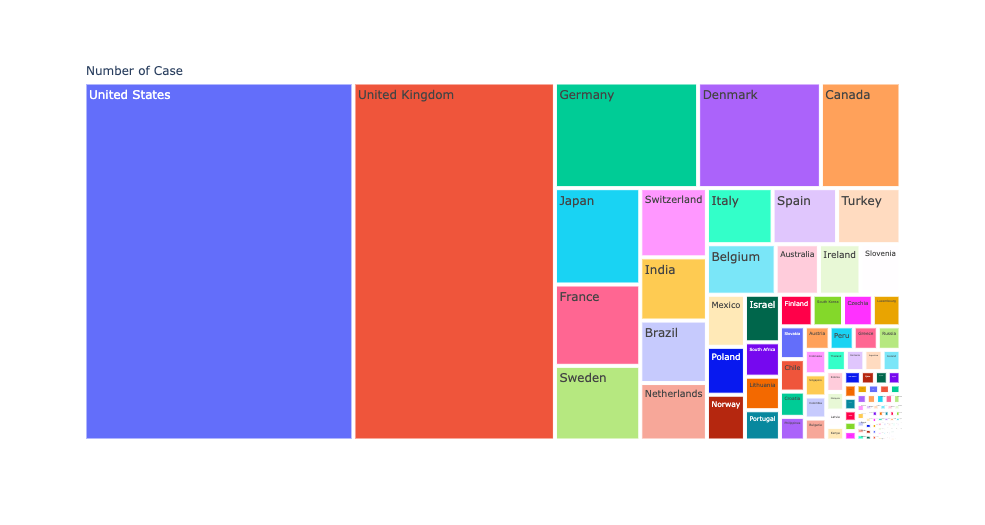

In [6]:
Image('Desktop/newplot.png')

### 지난 1년간, 미국과 영국이 압도적으로 많은 횟수의 코로나-19 발병 케이스를 직관적으로 확인할 수 있습니다.

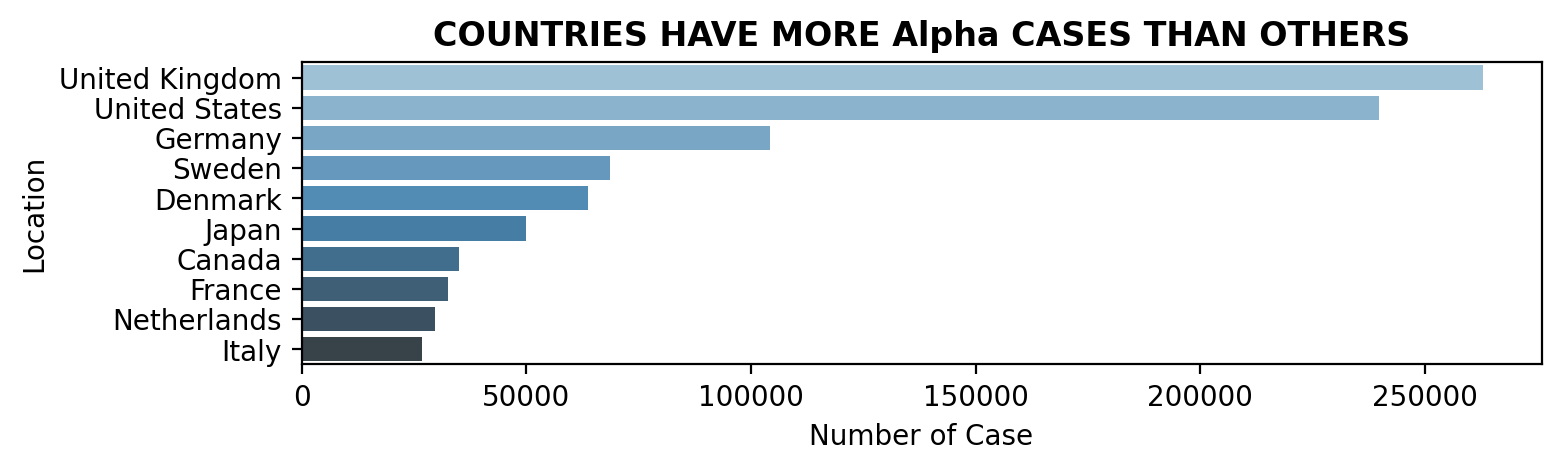

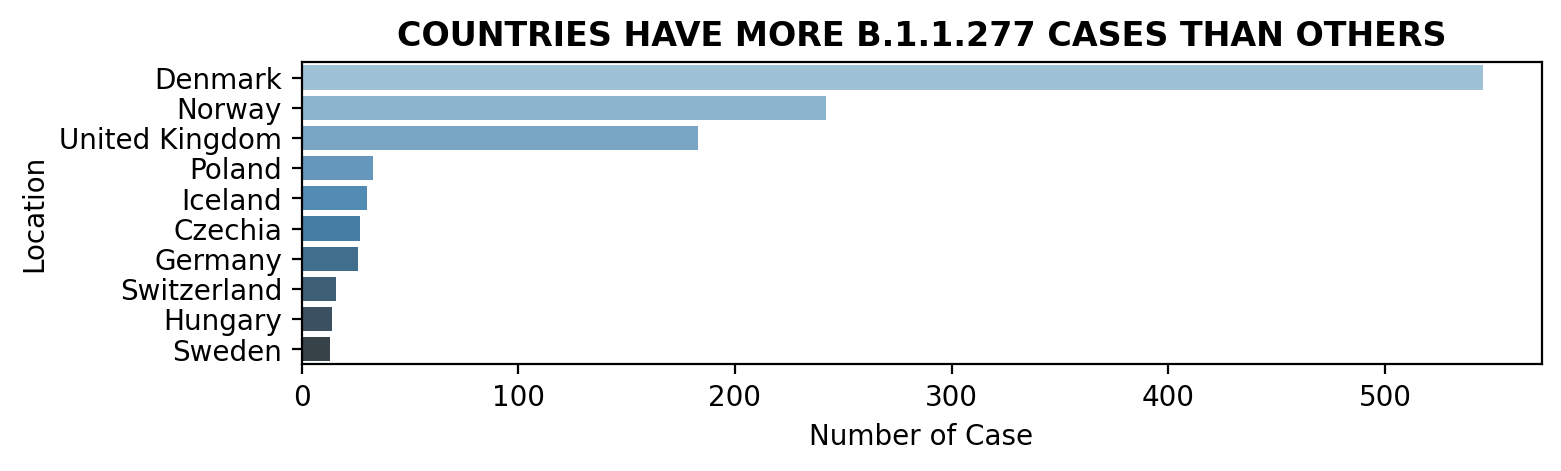

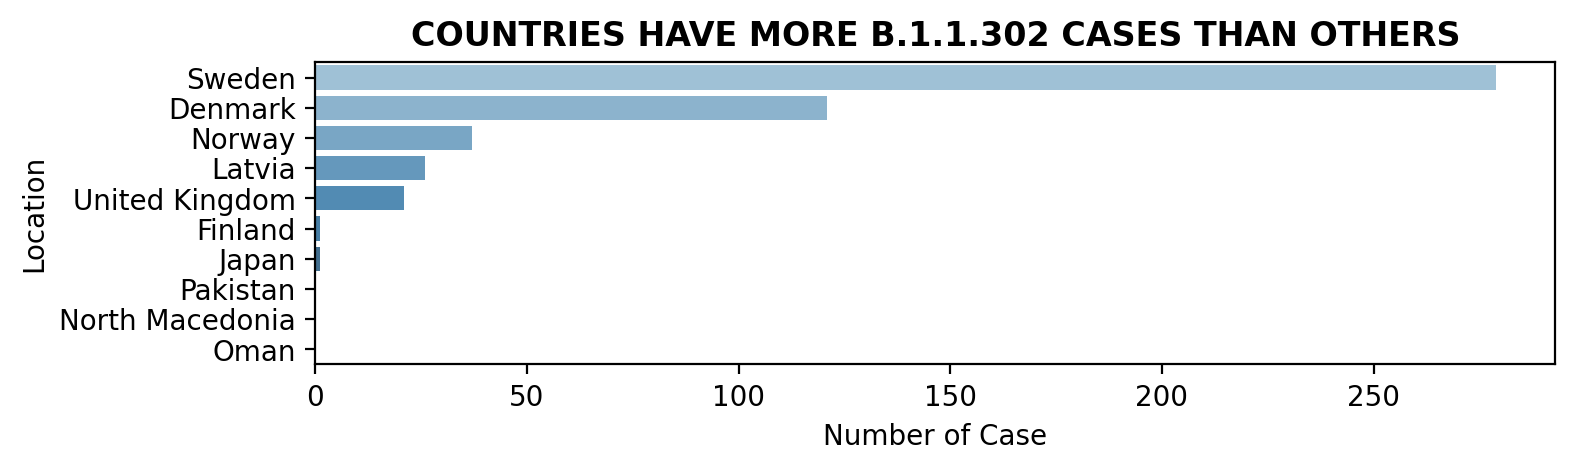

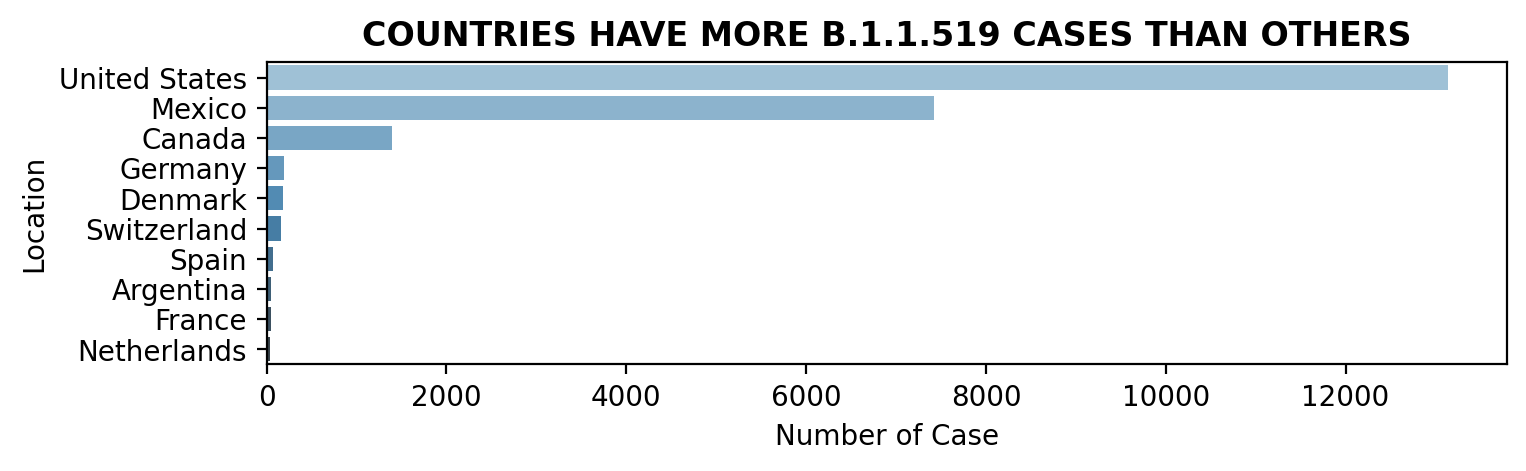

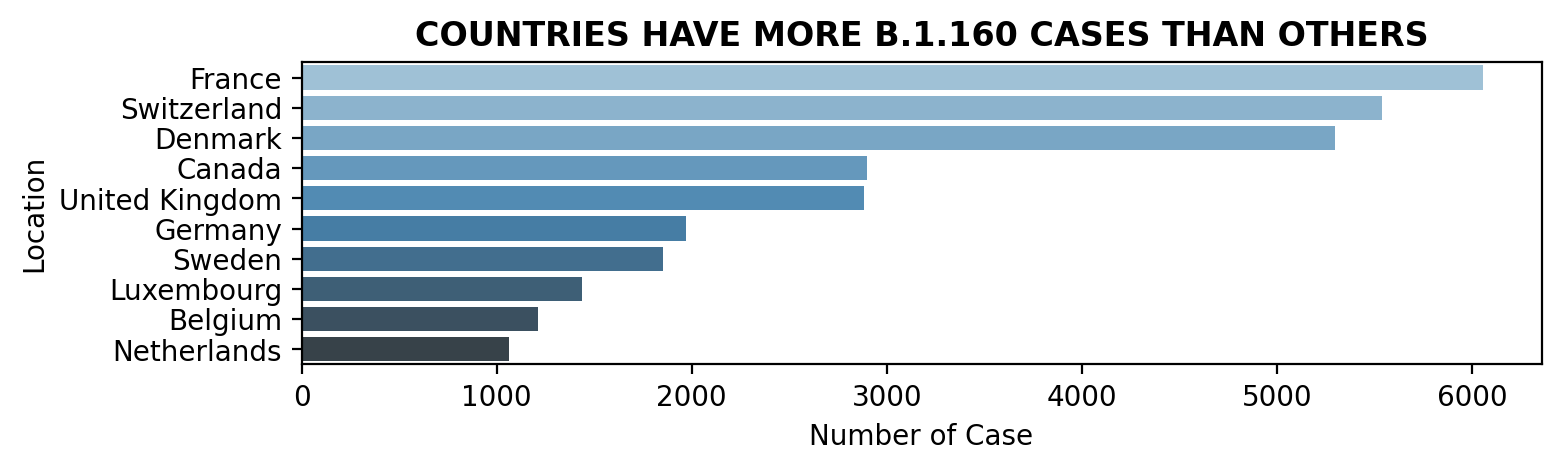

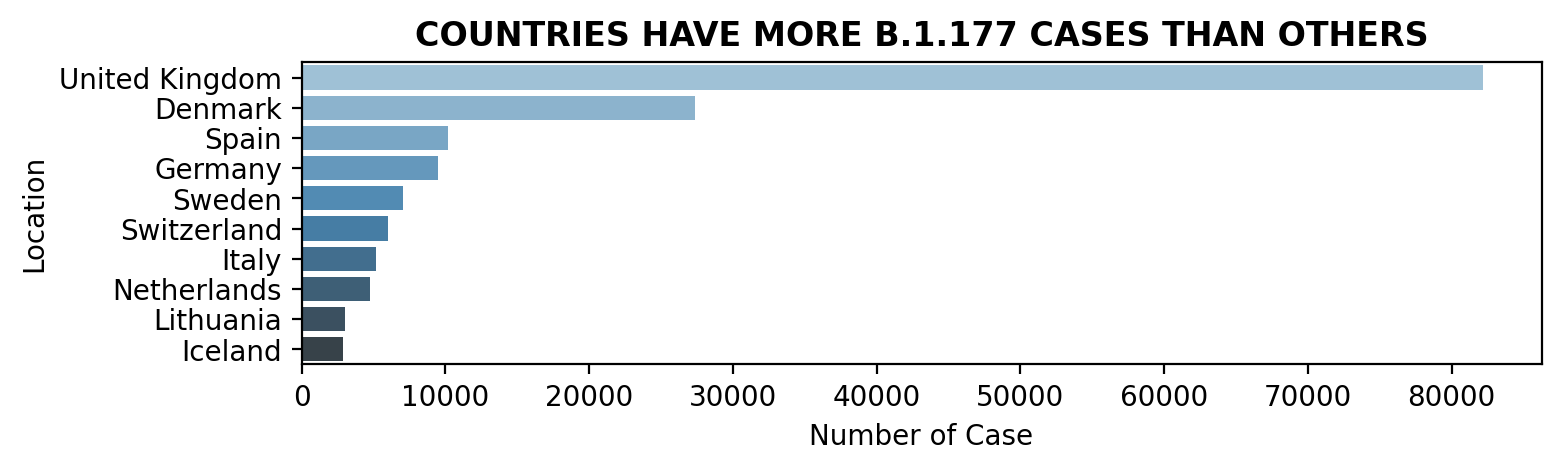

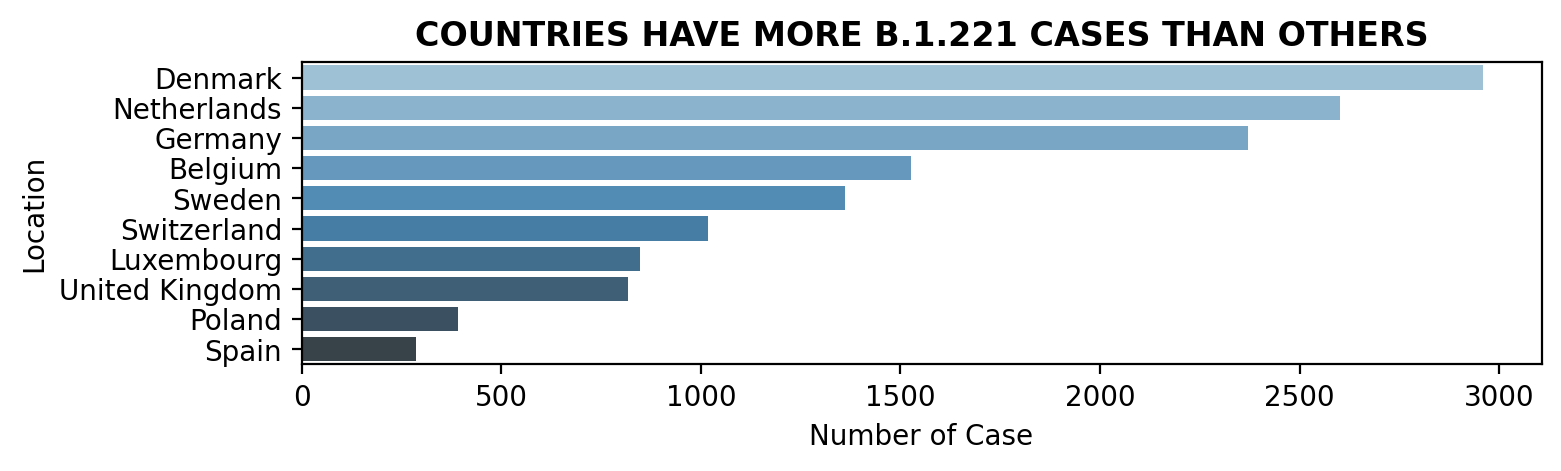

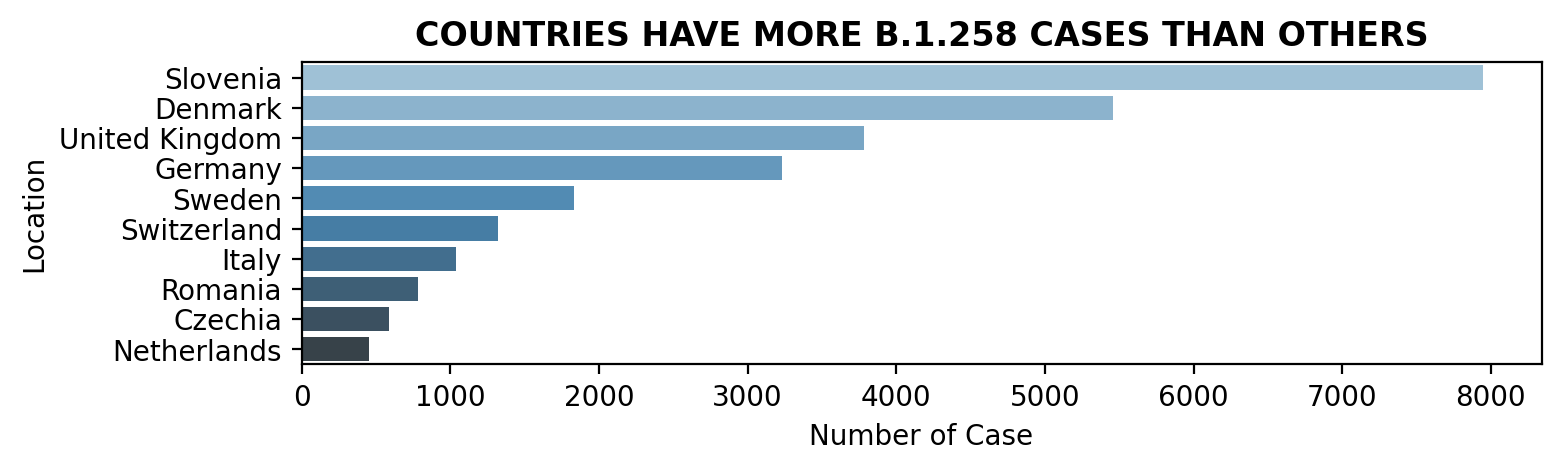

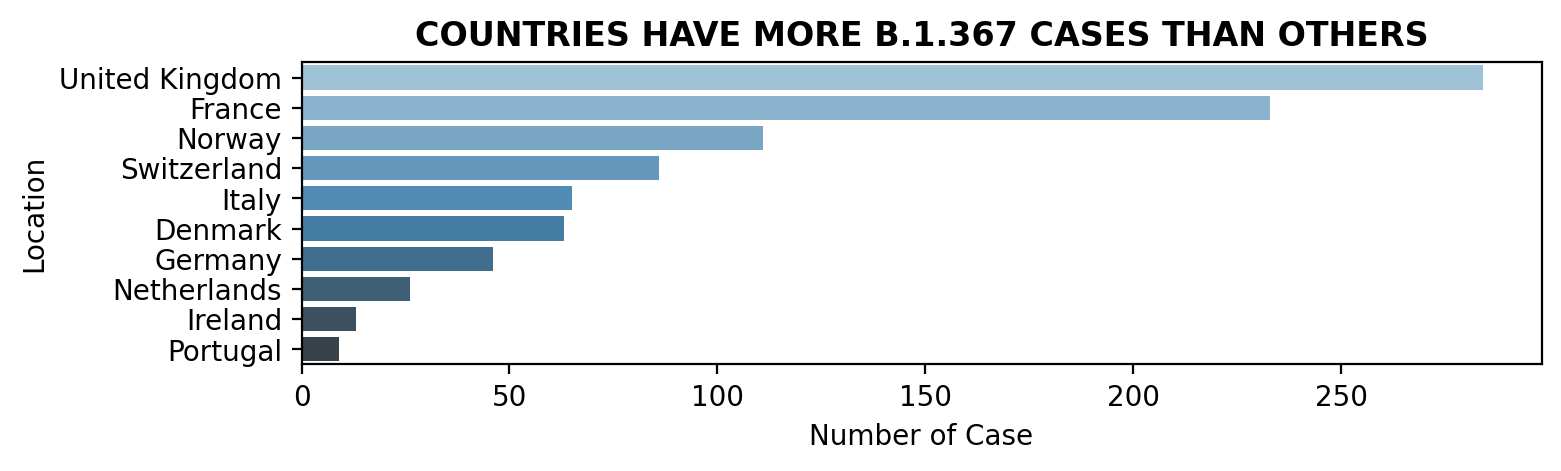

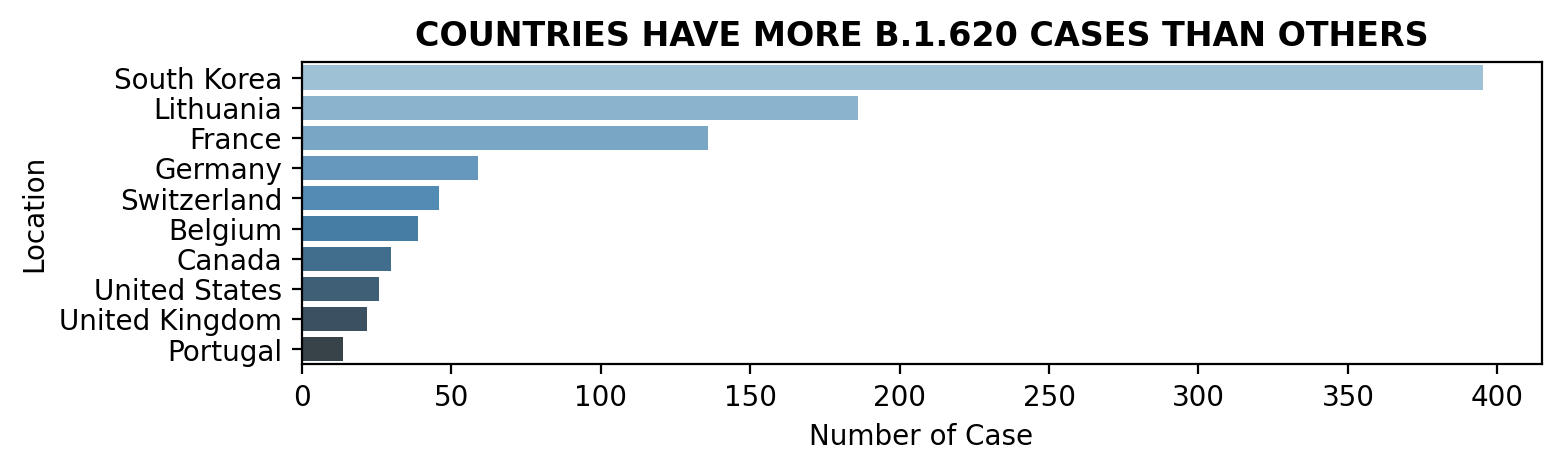

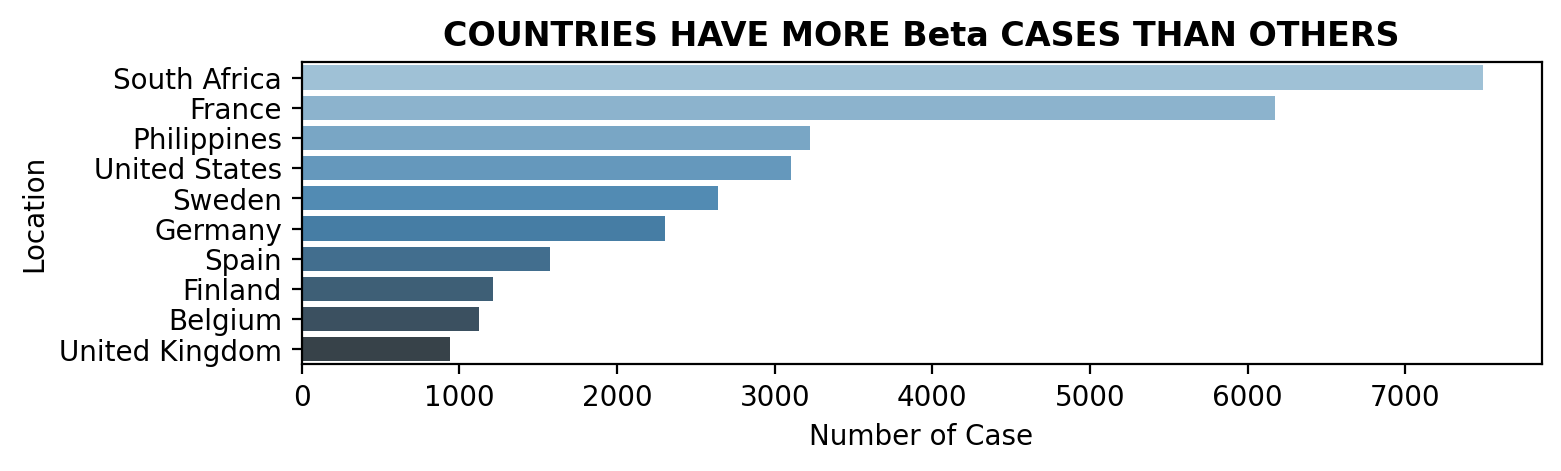

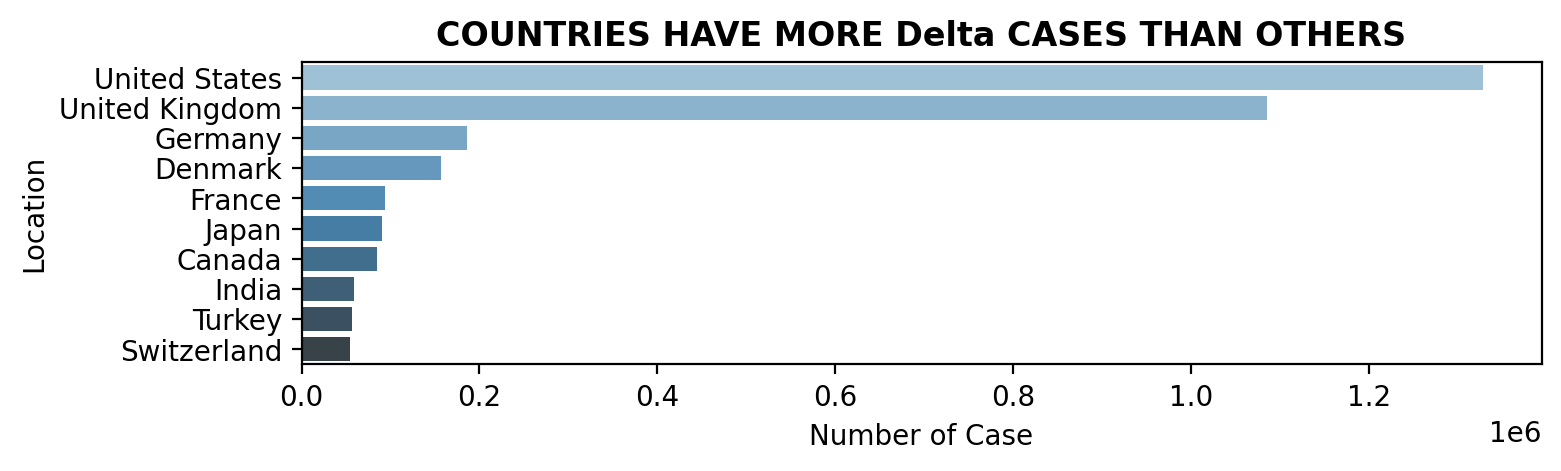

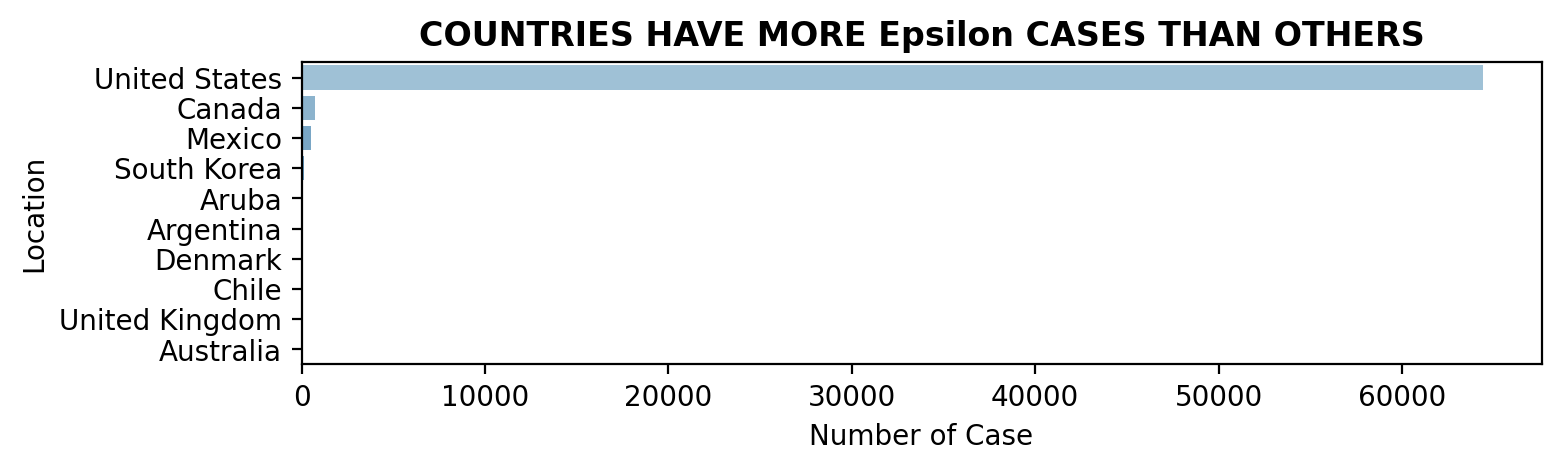

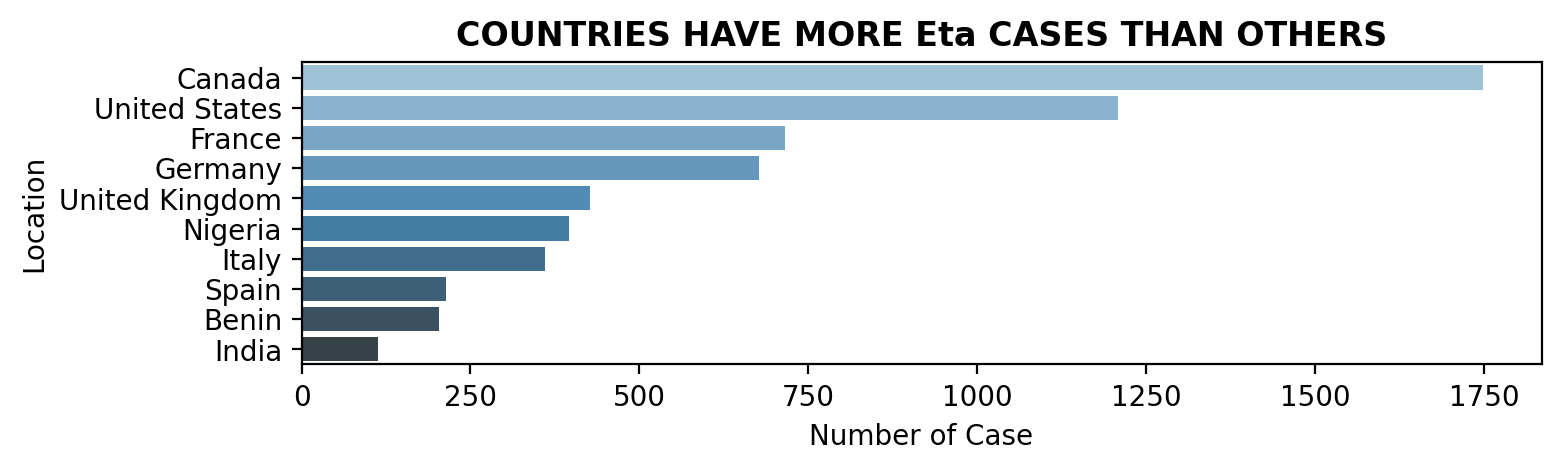

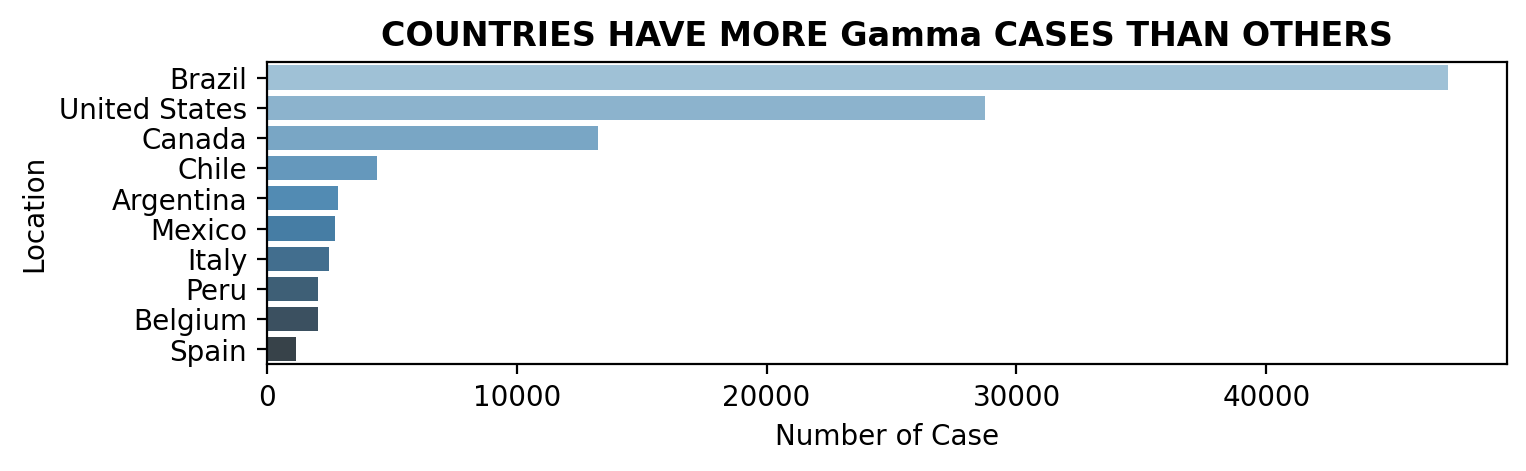

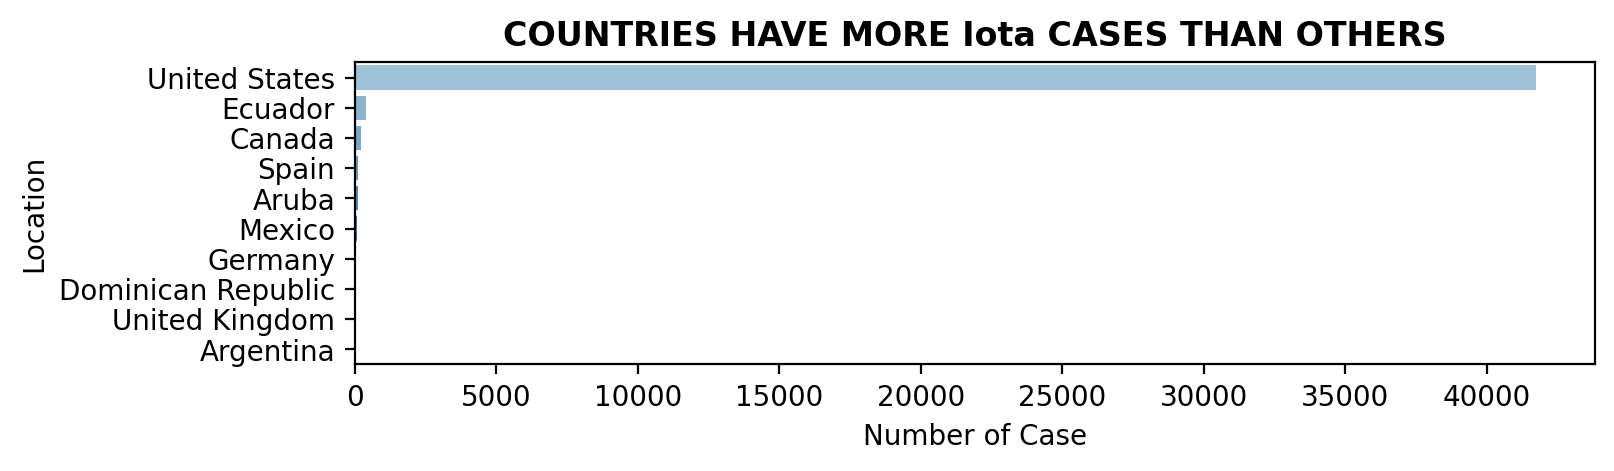

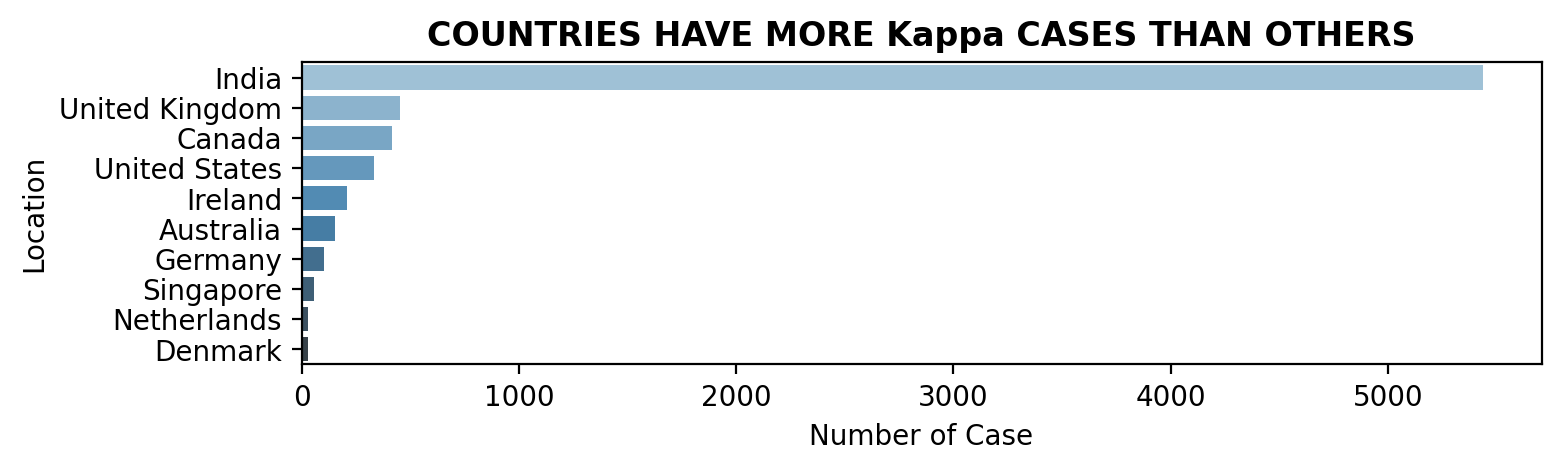

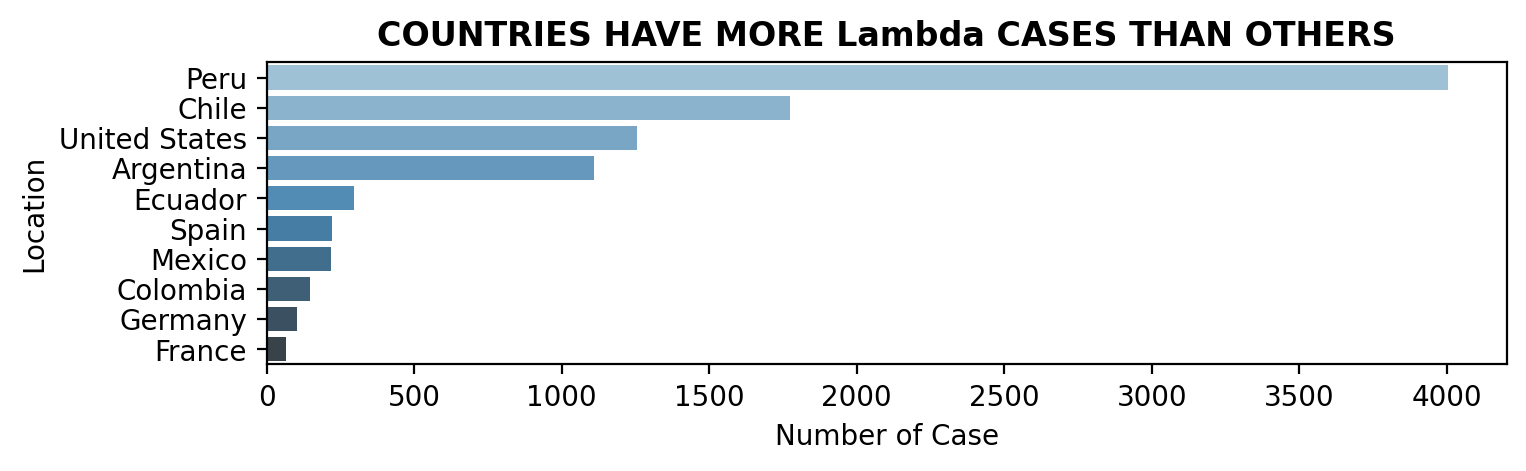

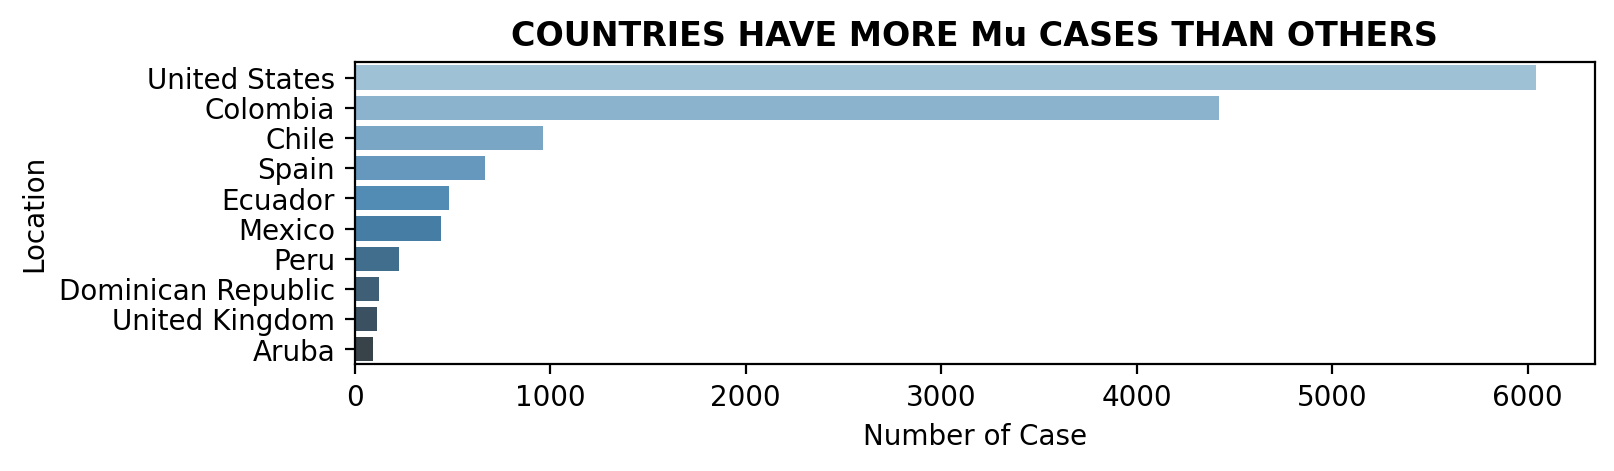

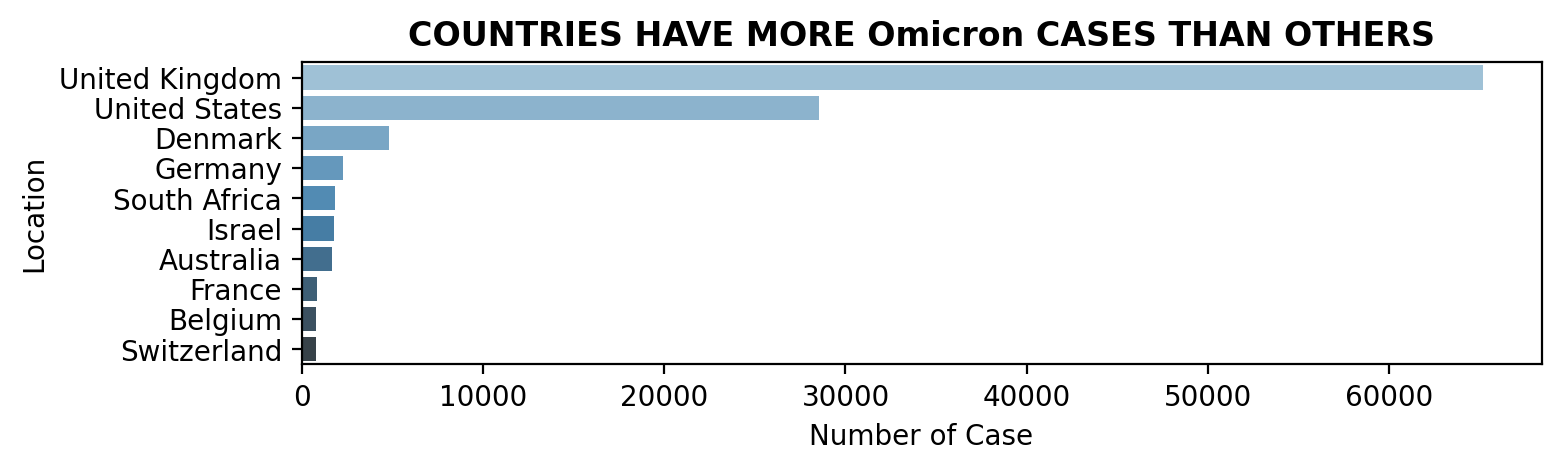

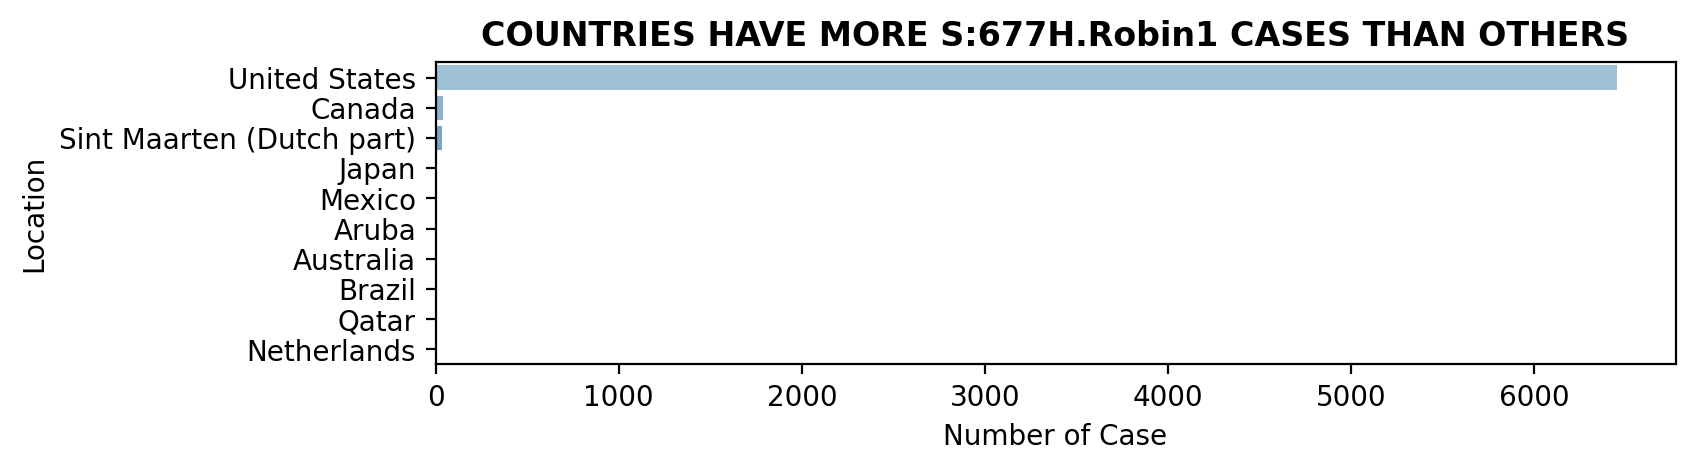

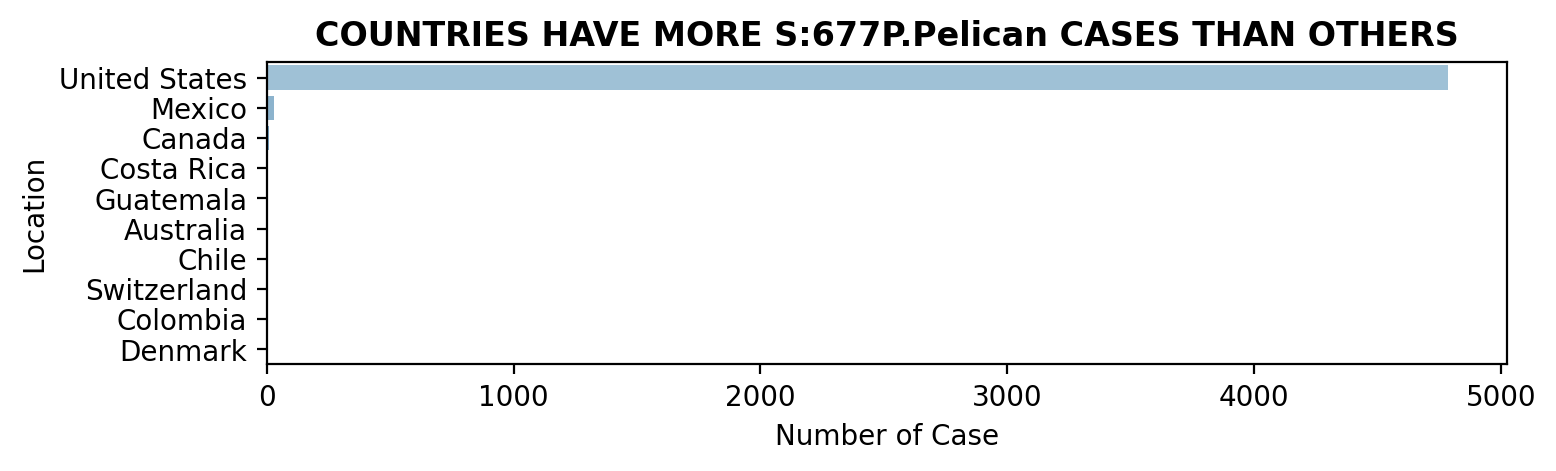

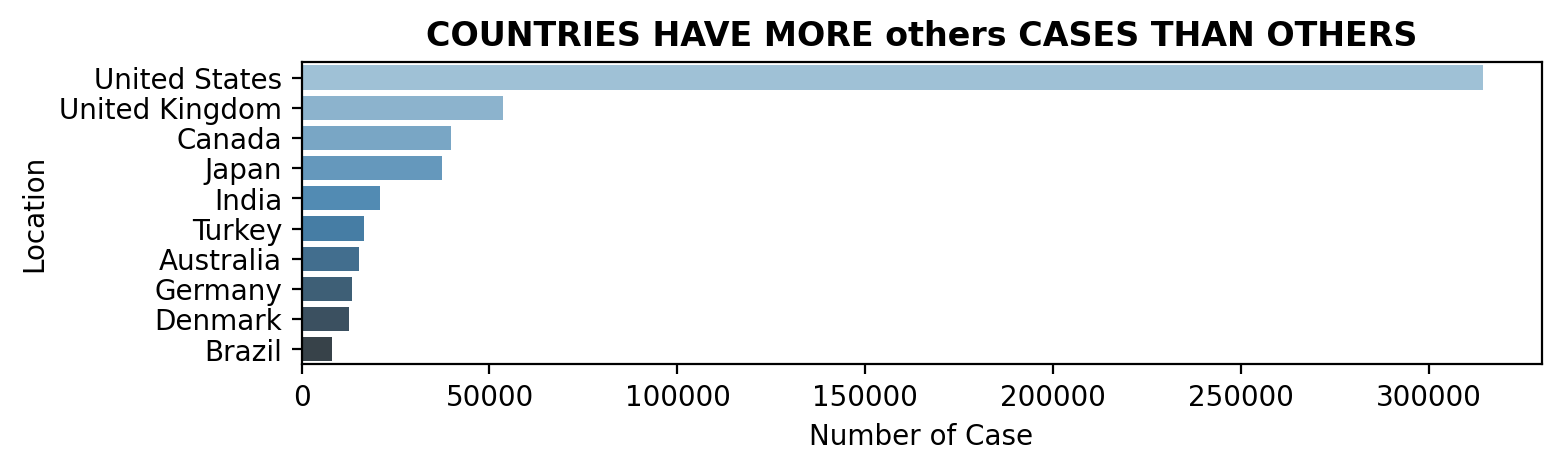

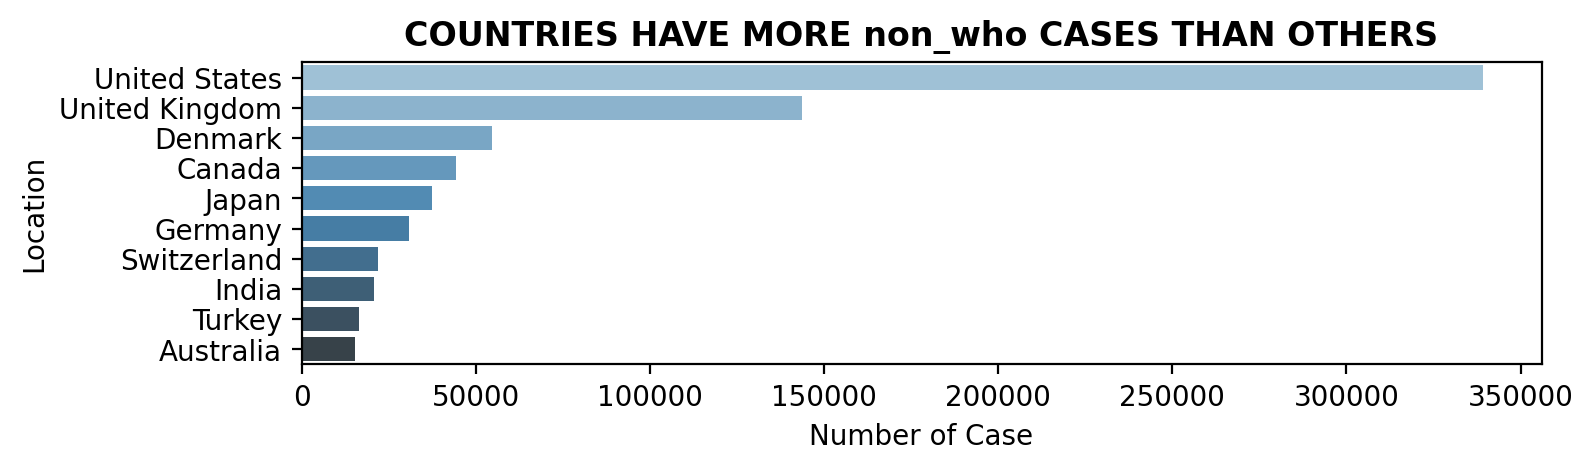

In [7]:
# 코로나-19 의 다양한 형질 별 국가 발병 횟수

for virus in data.variant.unique():
    dataframe = data.loc[data.variant == virus].groupby("location")["num_sequences"].agg("sum").\
    sort_values(ascending = False)[:10]
    dataframe = pd.DataFrame({"Location": dataframe.index, "Number of Case": dataframe.values})
    plt.figure(figsize = (8,2), dpi = 200)
    sns.barplot(y = "Location", x = "Number of Case", data = dataframe, palette = "Blues_d")
    plt.title("COUNTRIES HAVE MORE {} CASES THAN OTHERS".format(virus), loc = "center", fontweight = "bold")

### 2020.07.06 ~ 2021.11.01 간, 대한민국에서 B.1.620 형질이 다른 나라에 비해 코로나-19 발병 케이스가 많습니다.
### 대체적으로, 미국과 영국을 중심으로 대부분의 코로나-19 형질 타입이 다른 나라에 비해 높은 사실을 알 수 있습니다.

In [8]:
# 현재 우세종, 오미크론 type focus

sample = data.loc[data.variant == "Omicron"].groupby("date")["num_sequences"].agg("sum")
dataframe = pd.DataFrame({"Date": sample.index, "Number of Case": sample.values})
fig = px.area(dataframe, y = "Number of Case", x = "Date")
fig.show()

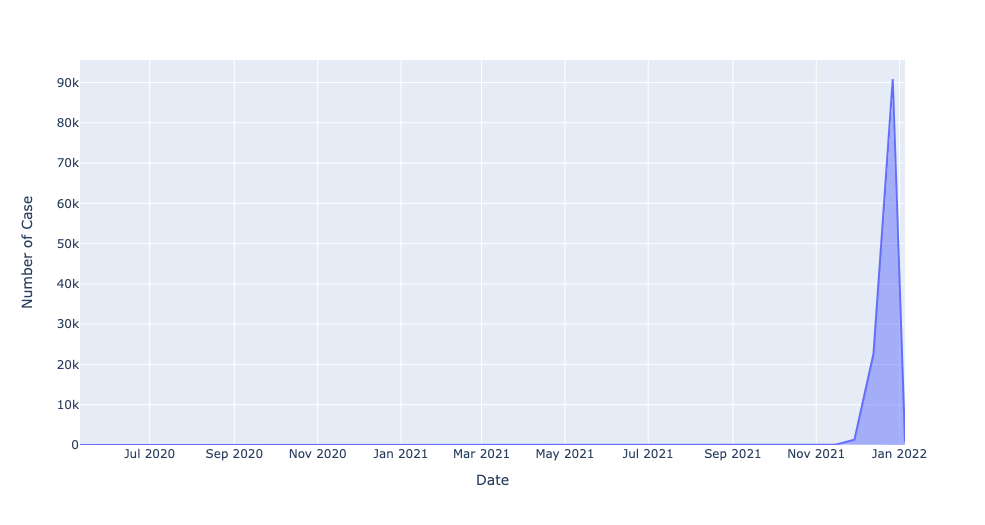

In [8]:
Image('Desktop/newplot (1).png')

### 2021년 11월 부터, 오미크론 type 발병 케이스가 영국과 미국을 중심으로 급격히 증가한 사실을 알 수 있습니다.